In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

import matplotlib.pyplot as mpl
mpl.rcParams['figure.dpi'] = 300

In [41]:
# import data
data = pd.read_csv('era_interim_SH_eke_300hPa.csv', header= None)

In [42]:
# print data
data=data[0]
print(data)

0       -16.5510
1        23.7330
2        35.4580
3        15.6640
4         5.9923
          ...   
13144     9.1789
13145   -23.3070
13146   -37.6850
13147   -21.0100
13148    -5.3250
Name: 0, Length: 13149, dtype: float64


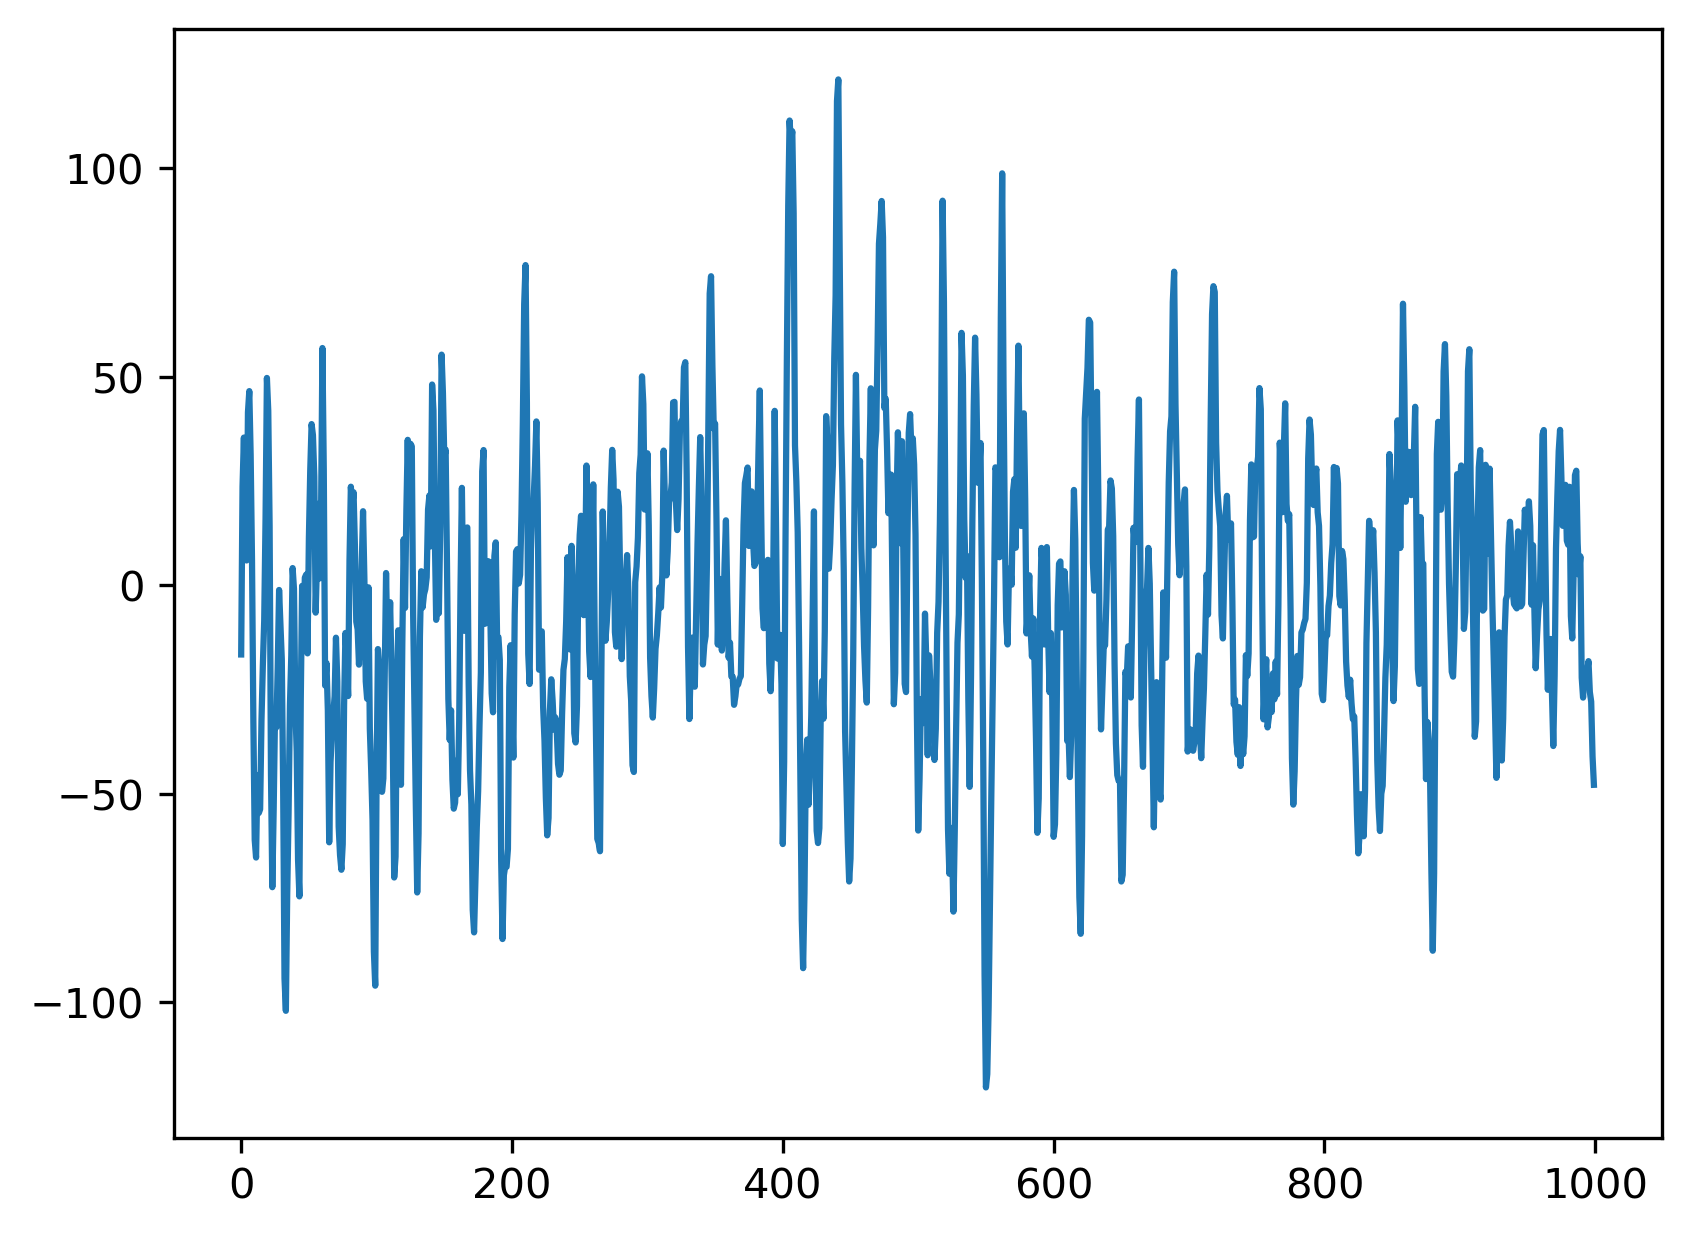

In [43]:
# plot data
ax, fig = plt.subplots()
plt.plot(data[:1000])


In [44]:
T = 256 # number of samples of each chunk
T2 = T/2 # overlap of each chunk
N = len(data)//T # number of chunks

In [45]:
f, Pxx_den = signal.welch(data,window = 'hann', nperseg=T, detrend= 'constant', noverlap = T2)

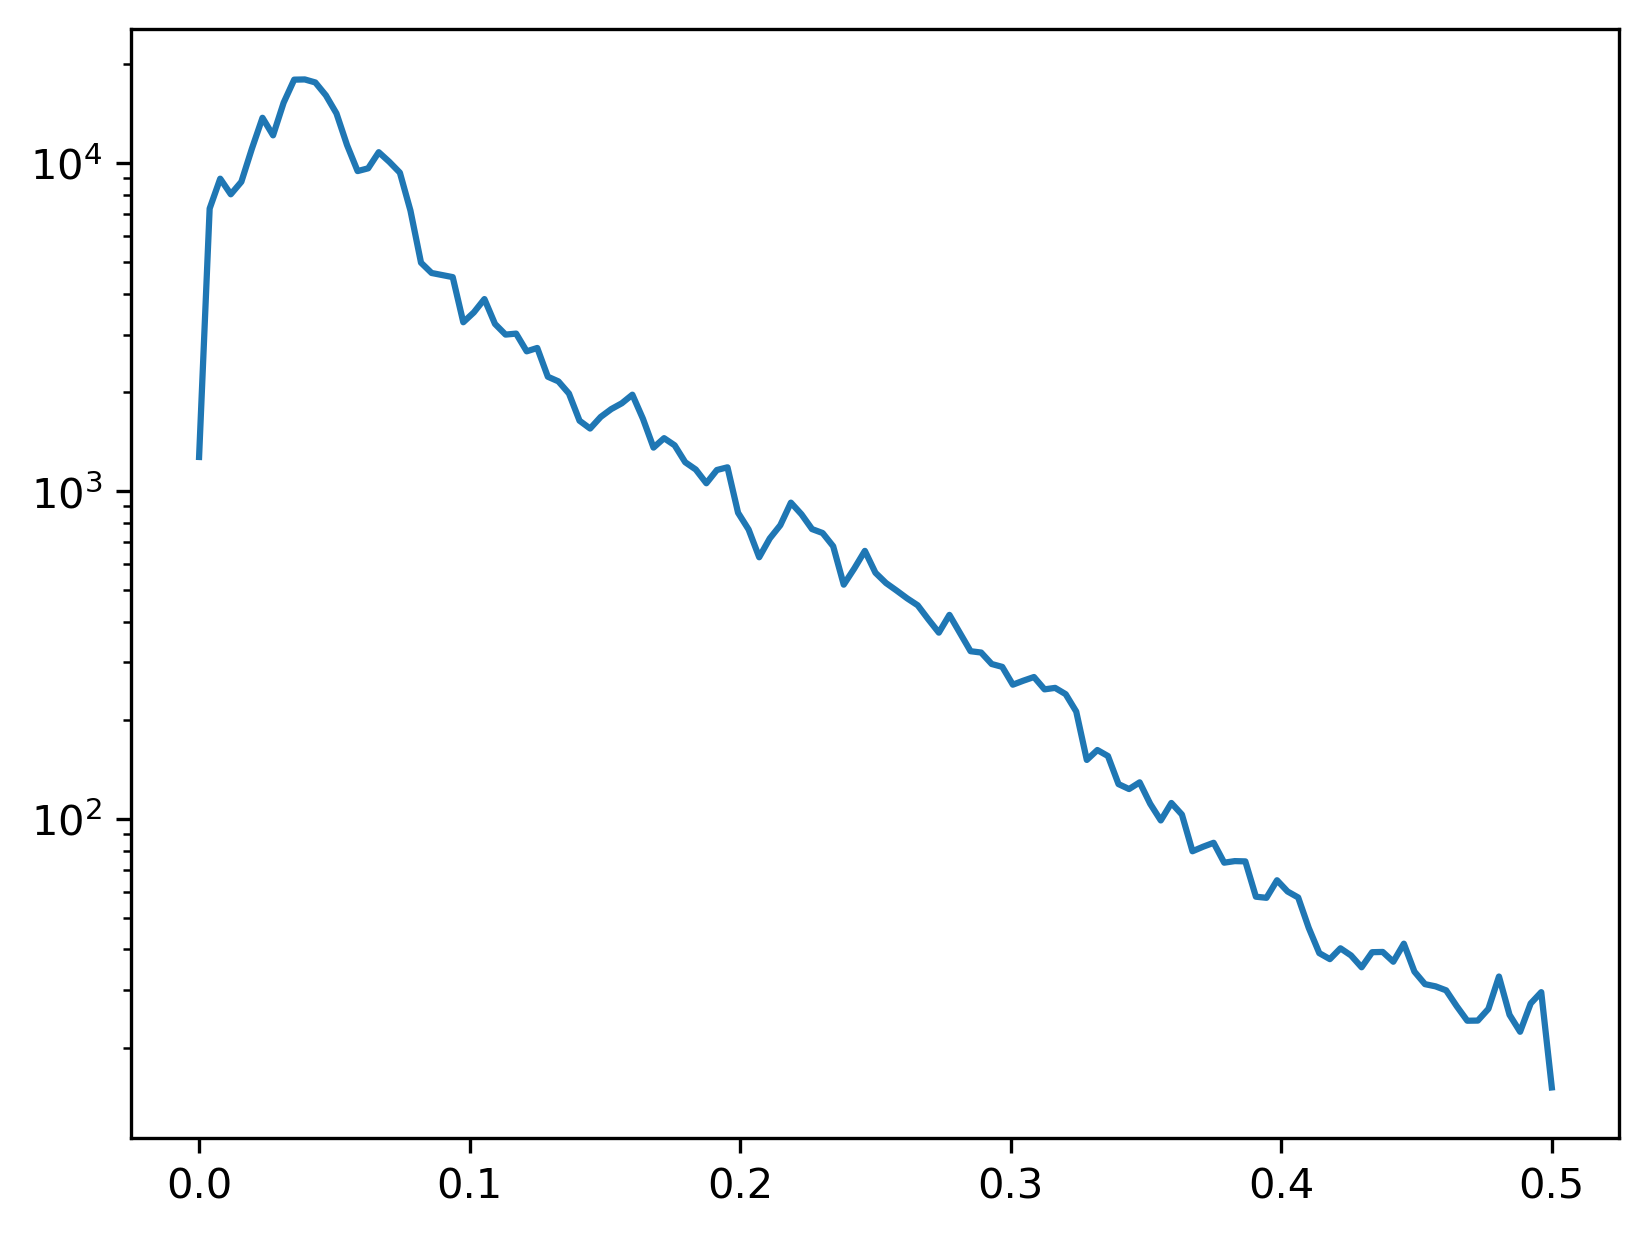

In [46]:
plt.semilogy(f, Pxx_den)

In [47]:
for i_chunk in range(N):
    chunk = data[i_chunk*T:(i_chunk+1)*T]
    f, Pxx_den = signal.welch(chunk,window = 'hann', nperseg=T, detrend= 'constant', noverlap = T2)
    sum_Pxx_den = Pxx_den if i_chunk == 0 else sum_Pxx_den + Pxx_den
ave_Pxx_den = sum_Pxx_den/N


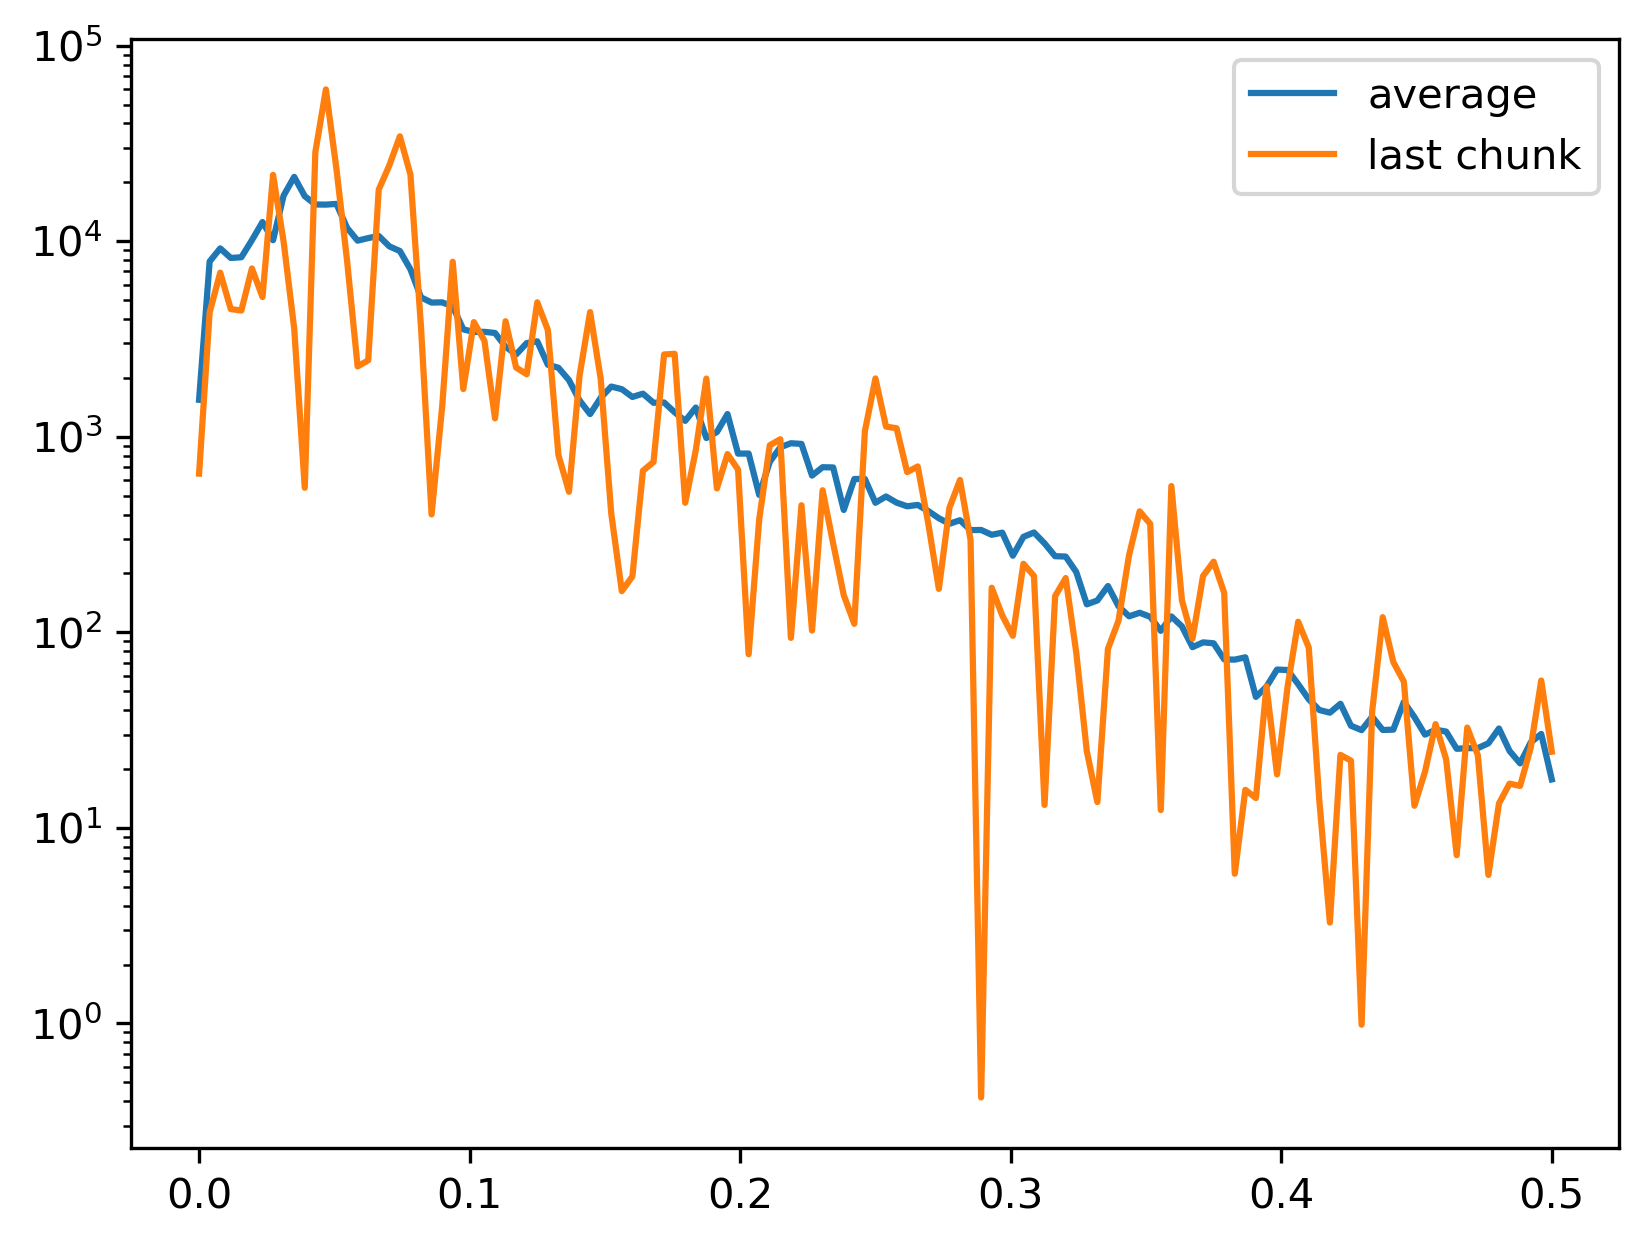

In [48]:
plt.semilogy(f, ave_Pxx_den, label = 'average')
plt.semilogy(f, Pxx_den, label = 'last chunk')
plt.legend()

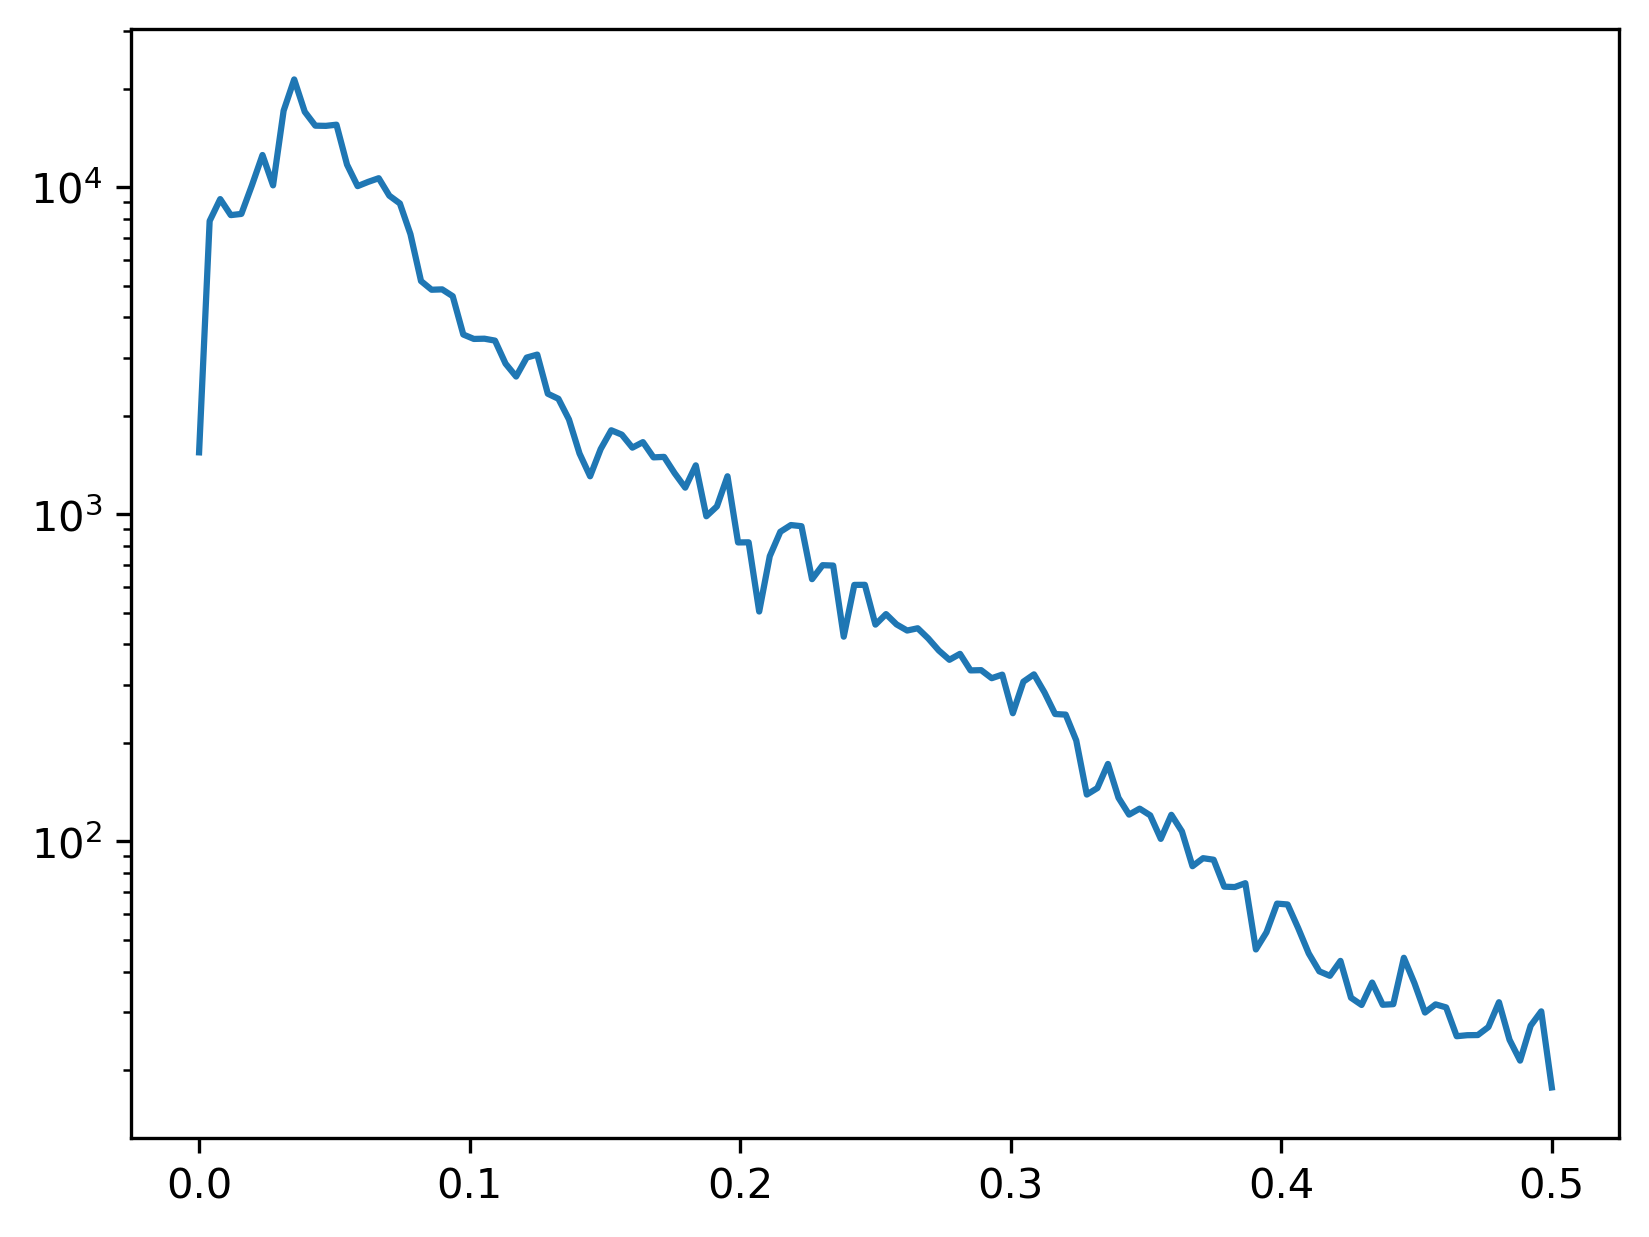

In [49]:
plt.plot(f, ave_Pxx_den)
plt.yscale('log')

In [58]:
# constructing a red noise
alpha = 0.1
r_noise_factor = np.sqrt(1-alpha**2)

In [59]:
def red_noise_generator(alpha_input, sample_length_input): # alpha is the red noise factor
    # n_input is the number of samples
    red_noise_factor = np.sqrt(1-alpha_input**2) # red noise factor
    red_noise_gen = np.zeros(sample_length_input) # initialize the red noise
    red_noise_gen[0] = red_noise_gen[-1] + red_noise_factor * np.random.randn() # first sample
    for j in range(1 ,sample_length_input):
        red_noise_gen[j] = alpha_input * red_noise_gen[j-1]  + red_noise_factor * np.random.randn()
        
    return red_noise_gen


In [60]:
red_noise = red_noise_generator(alpha, len(data))


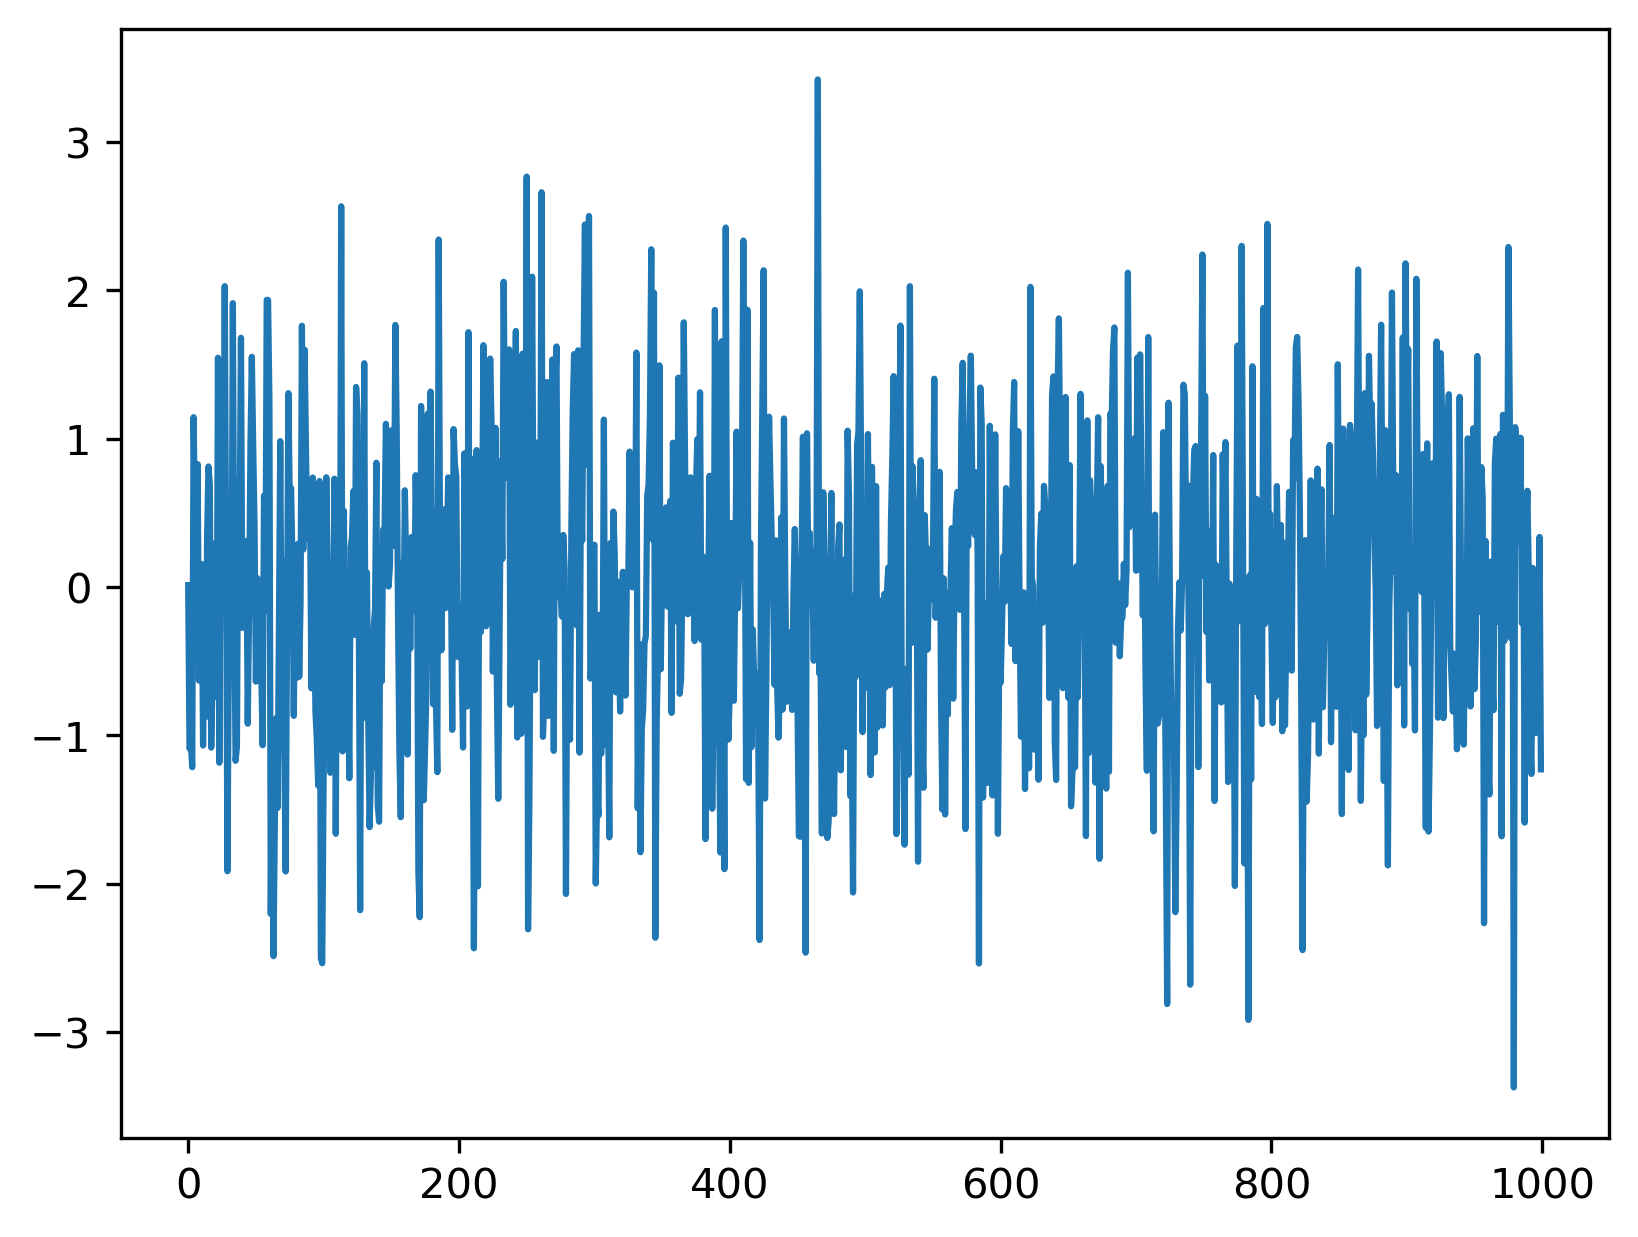

In [61]:
# plot red noise
plt.plot(red_noise[:1000])


In [63]:
for i_chunk in range(N):
    chunk_red = red_noise[i_chunk*T:(i_chunk+1)*T]
    f_red, Pxx_den_red = signal.welch(chunk_red,window = 'hann', nperseg=T, detrend= 'constant', noverlap = T2)
    sum_Pxx_den_red = Pxx_den_red if i_chunk == 0 else sum_Pxx_den_red + Pxx_den_red
ave_Pxx_den_red = sum_Pxx_den_red/N

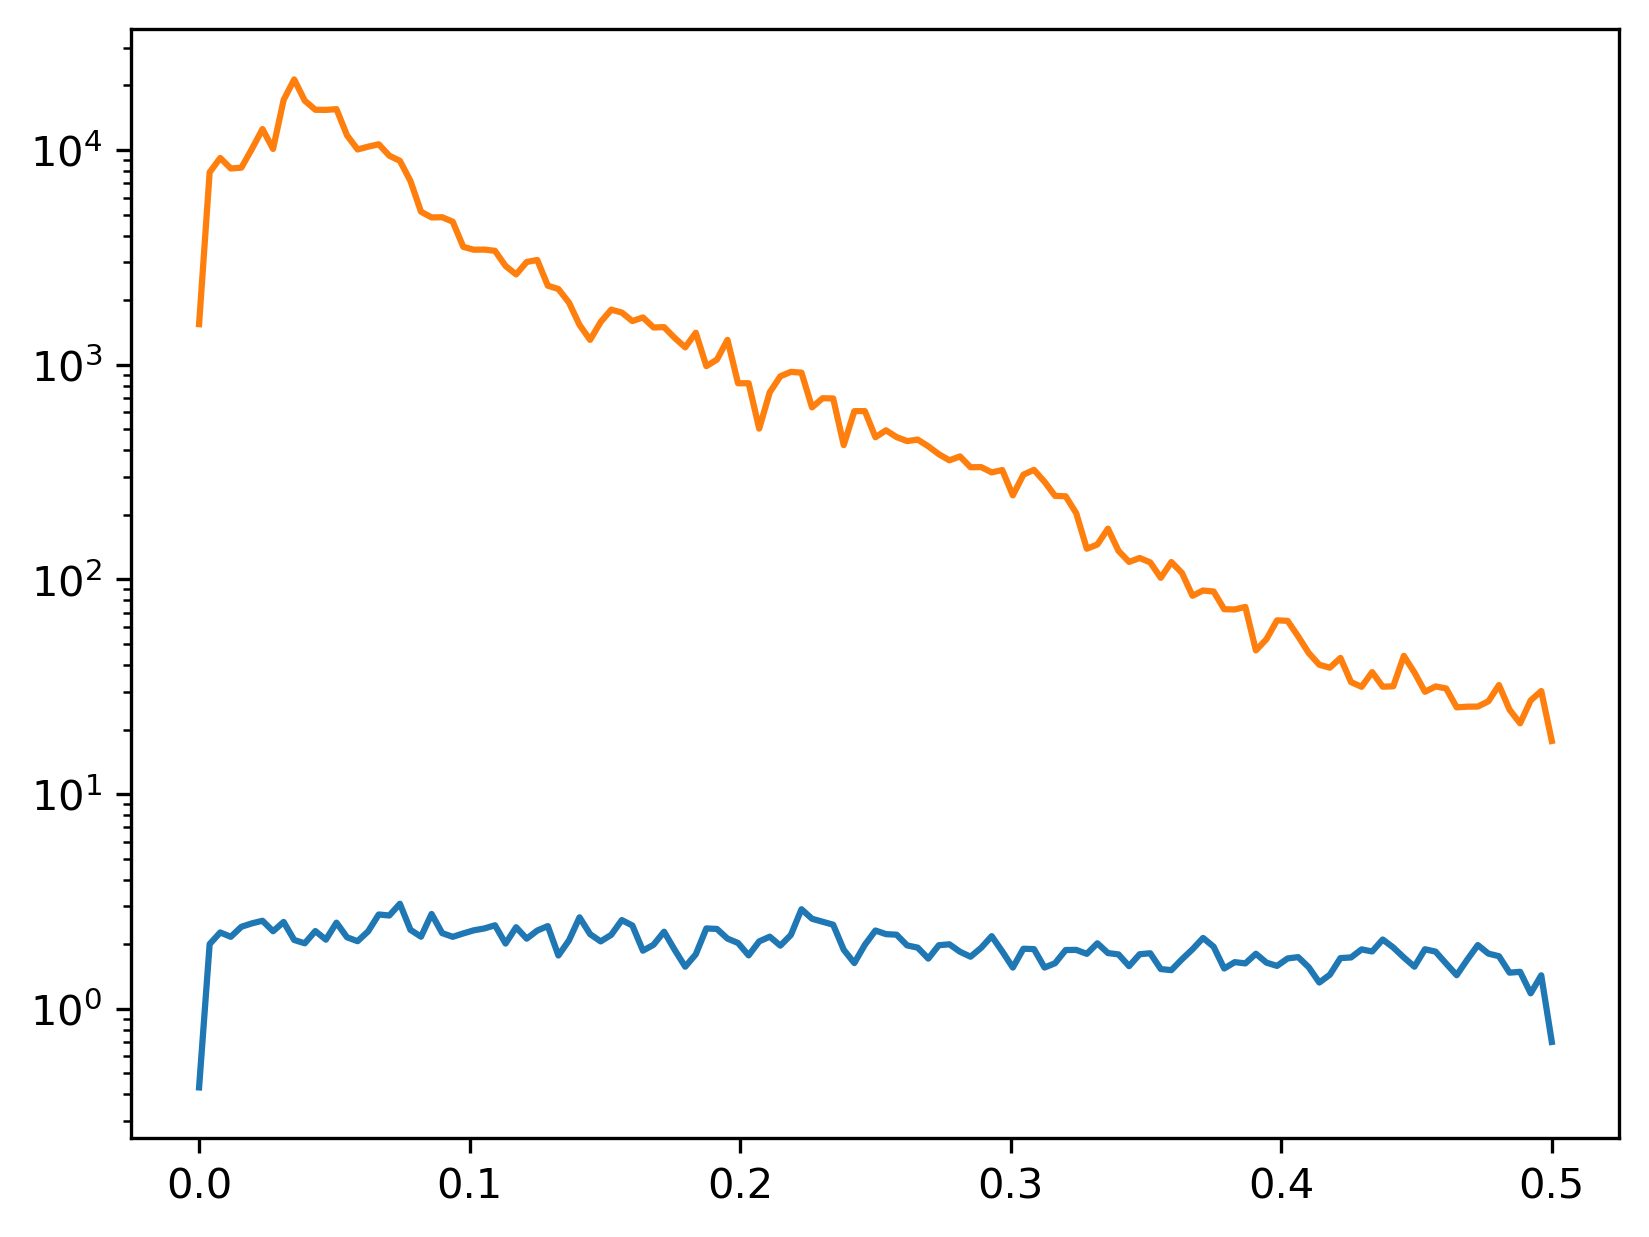

In [65]:
# plot red noise spectrum
plt.semilogy(f_red, ave_Pxx_den_red, label = 'red noise')
plt.semilogy(f, ave_Pxx_den, label = 'average')